In [2]:
import pathlib

In [3]:
# helper functions

#--------------------------------------------------------------------------------------#

def data_appender(data, path, folder):
    folderpath = os.path.join(path, folder)
    files = os.listdir(folderpath)
    
    for file in files:
        filepath = os.path.join(folderpath, file)
        data['imgpath'].append(filepath)
        data['labels'].append(folder)
    
    return data

#--------------------------------------------------------------------------------------#

def dataset_splitter(dataset, train_size = 0.9, test_size = 0.5, shuffle = True, random_state = 0):
    train_df, temp_df = train_test_split(dataset, train_size = train_size, 
                                         shuffle = shuffle, random_state = random_state)
    
    val_df, test_df = train_test_split(temp_df, test_size = test_size, 
                                       shuffle = shuffle, random_state = random_state)

    train_df = train_df.reset_index(drop = True)
    val_df = val_df.reset_index(drop = True)
    test_df = test_df.reset_index(drop = True)
    
    return train_df, val_df, test_df

#--------------------------------------------------------------------------------------#

## Mencari Gambar Di Folder 📂

In [4]:
data = {'imgpath': [], 'labels': []}
path = 'C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/Rice_Image_Dataset'
folders = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

for folder in folders:
    data = data_appender(data = data, path = path, folder = folder)

dataset = pd.DataFrame(data)
dataset.head()

,imgpath,labels
0,C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/...,Arborio
1,C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/...,Arborio
2,C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/...,Arborio
3,C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/...,Arborio
4,C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/...,Arborio


## Visualisasi Eksplorasi 📊

## Memvisualisasikan Gambar Acak 🔍

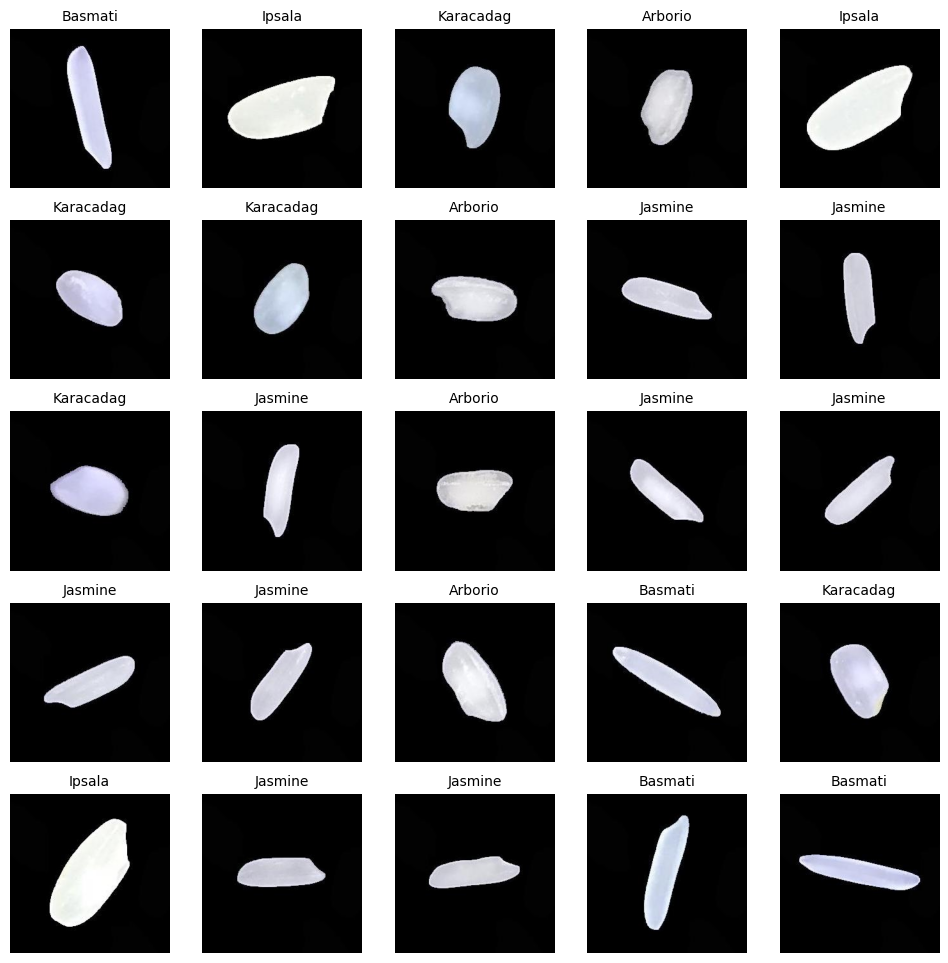

In [5]:
rows = 5
cols = 5

selected_indices = random.sample(range(len(dataset)), rows * cols)

fig, axes = plt.subplots(rows, cols, figsize = (12, 12))
gs = gridspec.GridSpec(rows, cols, wspace = 0.0, hspace = 0.0)

for i, idx in enumerate(selected_indices):
    row = i // cols
    col = i % cols
    img_path = dataset['imgpath'].iloc[idx]
    label = dataset['labels'].iloc[idx]
    img = Image.open(img_path)
    axes[row, col].imshow(img)
    axes[row, col].axis('off')
    axes[row, col].set_title(label, fontsize = 10)

plt.show()

### Distribusi Label 📊

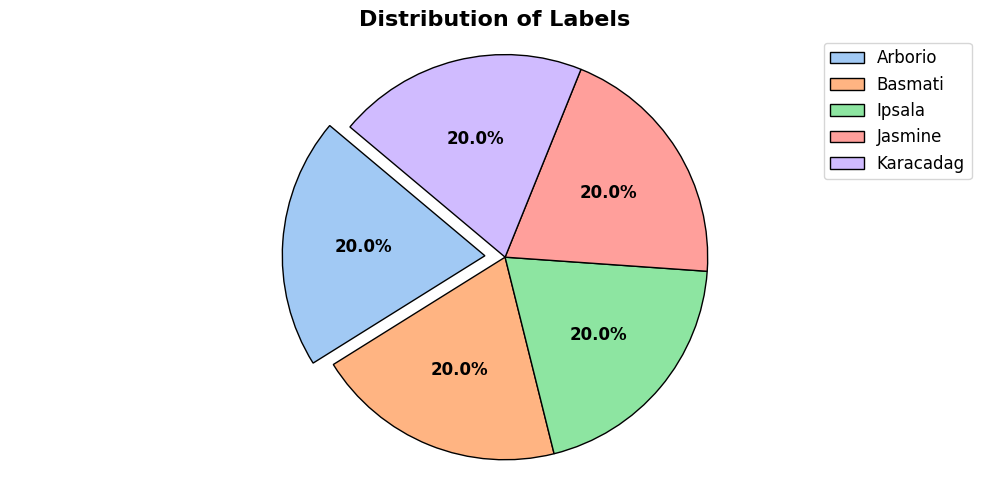

In [6]:
fig, ax = plt.subplots(figsize = (10, 5))

labels = dataset['labels'].value_counts().index
sizes = dataset['labels'].value_counts().values
colors = sns.color_palette('pastel')

wedges, texts, autotexts = ax.pie(sizes, colors = colors, 
                                  autopct = '%1.1f%%', startangle = 140, 
                                  explode = (0.1, 0, 0, 0, 0), wedgeprops = dict(edgecolor = 'black'))

ax.set_title('Distribution of Labels', fontsize = 16, fontweight = 'bold')
ax.axis('equal') 
ax.legend(wedges, labels, loc = "best", fontsize = 12)

for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

## Data Pre-Processing 🧪

In [7]:
train_df, val_df, test_df = dataset_splitter(dataset)

print(f'\nTraining Dataframe of shape {train_df.shape}: \n{train_df.head()}')
print(f'\nValidation Dataframe of shape {val_df.shape}: \n{val_df.head()}')
print(f'\nTesting Dataframe of shape {test_df.shape}: \n{test_df.head()}')


Training Dataframe of shape (45, 2): 
                                             imgpath   labels
0  C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/...   Ipsala
1  C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/...  Jasmine
2  C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/...  Jasmine
3  C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/...   Ipsala
4  C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/...  Arborio

Validation Dataframe of shape (2, 2): 
                                             imgpath     labels
0  C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/...  Karacadag
1  C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/...    Arborio

Testing Dataframe of shape (3, 2): 
                                             imgpath   labels
0  C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/...  Basmati
1  C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/...   Ipsala
2  C:/Users/karin/Desktop/python_ws/Fatlem-rep-8/...  Basmati


In [31]:
seed = 0
batch_size = 128
img_size = (224, 224)

generator = ImageDataGenerator(rescale=1.0/255)

train_data = generator.flow_from_dataframe(train_df, x_col='imgpath', y_col='labels',
                                           color_mode='rgb', class_mode='categorical',
                                           batch_size=batch_size, target_size=img_size,
                                           shuffle=True, seed=seed)

val_data = generator.flow_from_dataframe(val_df, x_col='imgpath', y_col='labels',
                                         color_mode='rgb', class_mode='categorical',
                                         batch_size=batch_size, target_size=img_size,
                                         shuffle=False)

test_data = generator.flow_from_dataframe(test_df, x_col='imgpath', y_col='labels',
                                          color_mode='rgb', class_mode='categorical',
                                          batch_size=batch_size, target_size=img_size,
                                          shuffle=False)

NameError: name 'ImageDataGenerator' is not defined

In [11]:
base_model = MobileNetV2(include_top = False, weights = 'imagenet', 
                       input_shape = img_size + (3,), pooling = 'max')

for layer in base_model.layers:
    layer.trainable = False

NameError: name 'MobileNetV2' is not defined

In [9]:
model = Sequential([
    Input(shape = img_size + (3,), name = 'input_layer'),
    base_model,
    
    Dense(512, activation = 'relu'),
    Dropout(0.4, seed = seed),
    
    Dense(256, activation = 'relu'),
    Dropout(0.4, seed = seed),
    
    Dense(len(set(train_data.classes)), activation = 'softmax', name = 'output_layer')
])

model.compile(optimizer = Adam(learning_rate = 0.001), 
              loss = CategoricalCrossentropy(), metrics = ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1280)           │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,046,469 (11.62 MB)

 Trainable params: 788,485 (3.01 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [10]:
%%time

model_es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 2, restore_best_weights = True)
model_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 1, mode = 'min')

history = model.fit(train_data, validation_data = val_data, 
                    epochs = 10, callbacks = [model_es, model_rlr])

Epoch 1/10
  2/528 ━━━━━━━━━━━━━━━━━━━━ 45s 86ms/step - accuracy: 0.1914 - loss: 7.8733   

I0000 00:00:1713934309.708348     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713934309.752056     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


528/528 ━━━━━━━━━━━━━━━━━━━━ 617s 1s/step - accuracy: 0.8751 - loss: 0.6337 - val_accuracy: 0.9845 - val_loss: 0.0477 - learning_rate: 0.0010
Epoch 2/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 165s 308ms/step - accuracy: 0.9741 - loss: 0.0798 - val_accuracy: 0.9829 - val_loss: 0.0500 - learning_rate: 0.0010
Epoch 3/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 167s 312ms/step - accuracy: 0.9850 - loss: 0.0465 - val_accuracy: 0.9872 - val_loss: 0.0375 - learning_rate: 2.0000e-04
Epoch 4/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 167s 312ms/step - accuracy: 0.9875 - loss: 0.0400 - val_accuracy: 0.9885 - val_loss: 0.0328 - learning_rate: 2.0000e-04
Epoch 5/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 165s 309ms/step - accuracy: 0.9885 - loss: 0.0362 - val_accuracy: 0.9885 - val_loss: 0.0340 - learning_rate: 2.0000e-04
Epoch 6/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 166s 310ms/step - accuracy: 0.9913 - loss: 0.0299 - val_accuracy: 0.9899 - val_loss: 0.0298 - learning_rate: 4.0000e-05
Epoch 7/10
528/528 ━━━━━━━━━━━━━━━━━━━━ 167s 312ms/step - accu

In [11]:
test_results = model.evaluate(test_data, verbose = 0)

print(f'Test Loss: {test_results[0]:.5f}')
print(f'Test Accuracy: {(test_results[1] * 100):.2f}%')

Test Loss: 0.02237
Test Accuracy: 99.25%


In [12]:
class_labels = list(train_data.class_indices.keys())

test_classes = test_data.classes
predicted_classes = np.argmax(model.predict(test_data, verbose = 0), axis = 1)

print(f'Classification Report (Test) --> \n\n' + \
f'{classification_report(test_classes, predicted_classes, target_names = class_labels)}')

Classification Report (Test) --> 

              precision    recall  f1-score   support

     Arborio       0.99      0.99      0.99       768
     Basmati       0.99      0.99      0.99       678
      Ipsala       1.00      1.00      1.00       763
     Jasmine       0.99      0.99      0.99       754
   Karacadag       0.99      1.00      0.99       787

    accuracy                           0.99      3750
   macro avg       0.99      0.99      0.99      3750
weighted avg       0.99      0.99      0.99      3750



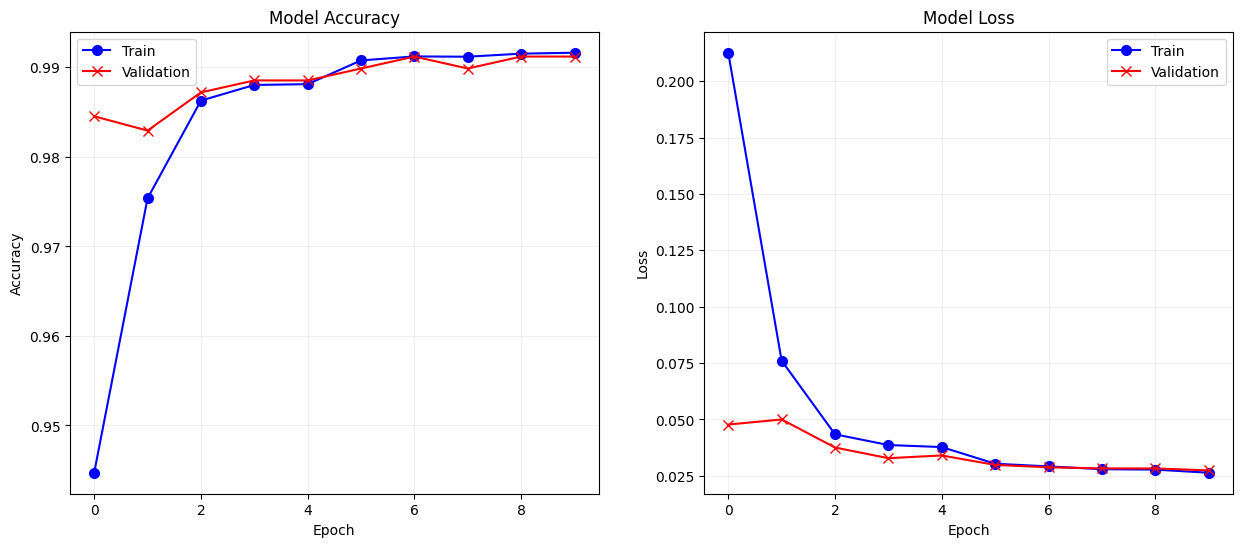

In [13]:
_, ax = plt.subplots(ncols = 2, figsize = (15, 6))

# accuracy

ax[0].plot(history.history['accuracy'], marker = 'o', color = 'blue', markersize = 7)
ax[0].plot(history.history['val_accuracy'], marker = 'x', color = 'red', markersize = 7)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Validation'])
ax[0].grid(alpha = 0.2)

# loss

ax[1].plot(history.history['loss'], marker = 'o', color = 'blue', markersize = 7)
ax[1].plot(history.history['val_loss'], marker = 'x', color = 'red', markersize = 7)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Validation'])
ax[1].grid(alpha = 0.2)

plt.show()

<Figure size 1000x1000 with 0 Axes>

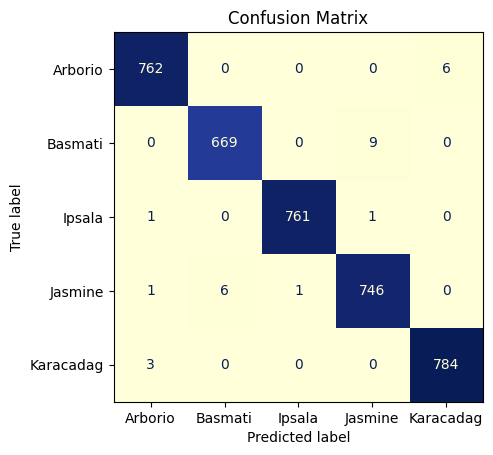

In [14]:
test_matrix = confusion_matrix(test_classes, predicted_classes)

class_labels = list(test_data.class_indices.keys())

disp_test = ConfusionMatrixDisplay(confusion_matrix = test_matrix, display_labels = class_labels)

plt.figure(figsize = (10, 10))

disp_test.plot(cmap = 'YlGnBu', colorbar = False)
plt.title('Confusion Matrix')

plt.show()